### A more realistic example

We'll see now a more realistic example. We have a dataset that contains the average weight of the brain and body for a number of mammal species ([source](http://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html)). We want to use a linear regression model to estimate the _Brain Weight_ of a subject, given its _Body Weight_.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [134]:
df = pd.read_csv(
    'data/x01.txt', skiprows=33, skipinitialspace=True,
    delimiter=' ',
    names=['idx', 'Brain Weight', 'Body Weight'],
    usecols=['Brain Weight', 'Body Weight'])
df.sort_values(by=['Body Weight'], inplace=True)
df.head()

,Brain Weight,Body Weight
13,0.005,0.14
39,0.010,0.25
19,0.023,0.30
54,0.048,0.33
38,0.023,0.40


As usual, let's take a quick look to our data, to see how it looks like:

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
Brain Weight    62 non-null float64
Body Weight     62 non-null float64
dtypes: float64(2)
memory usage: 1.0 KB


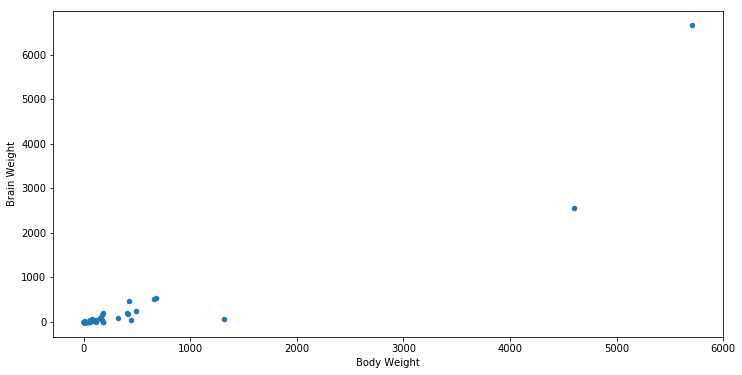

In [78]:
df.plot.scatter(x='Body Weight', y='Brain Weight', figsize=(12, 6))

Seems like it's going to be hard to set a straight line, but we'll try our best :)

### Splitting our data

We need to somehow "test" the accuracy of our model, once we've got it. For that, we need to split our data into a training set and ad testing set. We can't train our model with the same data we'll use to test it later, that'd be cheating 😉.

In [97]:
train_set = df.iloc[:30]
testing_set = df.iloc[30:]

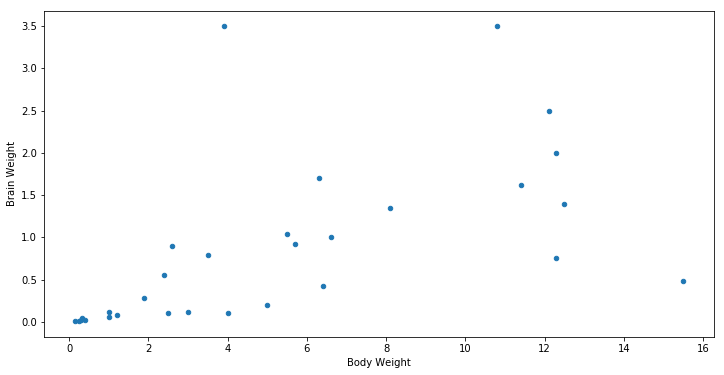

In [98]:
train_set.plot.scatter(x='Body Weight', y='Brain Weight', figsize=(12, 6))

We first need to prepare our data:

In [100]:
x_train = train_set['Body Weight'].values.reshape((len(train_set), 1))
y_train = train_set['Brain Weight'].values

x_test = testing_set['Body Weight'].values.reshape((len(testing_set), 1))
y_test = testing_set['Brain Weight'].values

In [85]:
lr = LinearRegression()

lr.fit(x_train, y_train)

/Users/santiagobasulto/.virtualenvs/ds-classes/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
slope = lr.coef_[0]
slope

0.12295181007748501

In [87]:
intercept = lr.intercept_
intercept

0.2017166114162029

Text(0.5,1,'Linear Regression Model - Training Data')

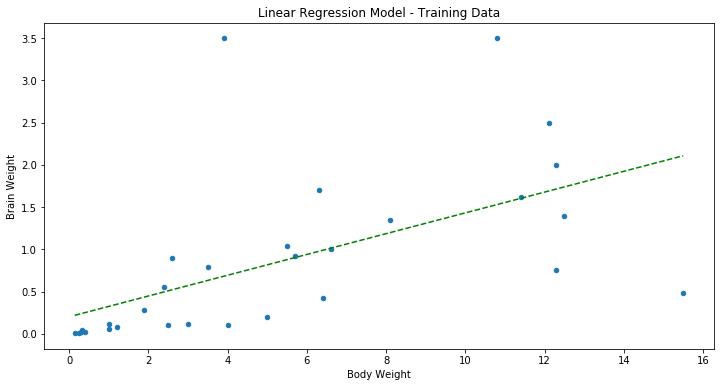

In [89]:
train_set.plot.scatter(x='Body Weight', y='Brain Weight', figsize=(12, 6))

body_weights = train_set['Body Weight'].values
plt.plot(body_weights, [x * slope + intercept for x in body_weights], 'g--')

plt.title('Linear Regression Model - Training Data')

According to `scikit-learn`, this is the best model that we can fit.

### Evaluating our model

Our `testing_set` is part of our original dataset, so we can test our model and see how good it performed. For example, the first 5 testing values are:

In [99]:
testing_set.head()

,Brain Weight,Body Weight
36,4.05,17.0
26,1.41,17.5
49,3.60,21.0
56,3.00,25.0
24,3.30,25.6


What will our linear model predict? Let's see:

In [104]:
predicted_values = lr.predict(x_test[:5])
predicted_values

array([2.29189738, 2.35337329, 2.78370462, 3.27551186, 3.34928295])

In [108]:
pd.DataFrame({
    'Body Weight': x_test[:5].flatten(),
    'Predicted Values': predicted_values,
    'Real Values': y_test[:5],
    'Difference': np.abs(y_test[:5] - predicted_values)
}, columns=['Body Weight', 'Predicted Values', 'Real Values', 'Difference'])

,Body Weight,Predicted Values,Real Values,Difference
0,17.0,2.291897,4.05,1.758103
1,17.5,2.353373,1.41,0.943373
2,21.0,2.783705,3.60,0.816295
3,25.0,3.275512,3.00,0.275512
4,25.6,3.349283,3.30,0.049283


Some seem a little far off, some other ones look a little bit better. We can use the [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) for a better idea: 

In [113]:
mean_squared_error(y_test, lr.predict(x_test))

1251798.7846496059

The problem with the Mean squared error method is that it's usually hard to read. The error in that case is expressed in "squared grams", which doesn't make sense. A common practice is to use the [**Root** Mean Square error](https://en.wikipedia.org/wiki/Root-mean-square_deviation) method, which just takes the square root of the previous MSE:

In [119]:
np.sqrt(mean_squared_error(y_test, lr.predict(x_test)))

1118.838140505411

Another common indicator of the "quality" of your estimator is the ["R squared" score](https://en.wikipedia.org/wiki/Coefficient_of_determination) (`R2`). It's built into the `LinearRegression` model:

In [114]:
lr.score(x_test, y_test)

0.14844132913184338

And also as the standalone [`r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score) function:

In [121]:
r2_score(y_test, lr.predict(x_test))

0.14844132913184338

Our estimation isn't really good, a perfect estimation would get a R^2 score of `1.0`. If we compare our model with the real data we'll see it more clearly:

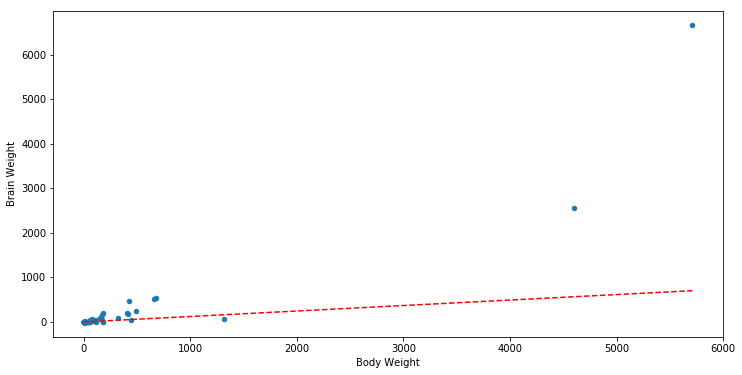

In [132]:
df.plot.scatter(x='Body Weight', y='Brain Weight', figsize=(12, 6))
plt.plot(df['Body Weight'], [x * slope + intercept for x in df['Body Weight']], 'r--')

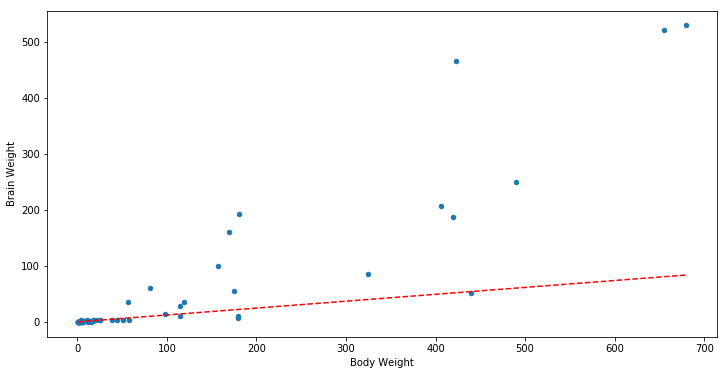

In [133]:
subdf = df[(df['Body Weight'] < 1000) & (df['Brain Weight'] < 1000)]

subdf.plot.scatter(x='Body Weight', y='Brain Weight', figsize=(12, 6))
plt.plot(subdf['Body Weight'], [x * slope + intercept for x in subdf['Body Weight']], 'r--')